# Introduction to Python

<b>If you're advanced in python, just check you're happy with the examples here. Mutability is a "advanced" issue, for most so you may be surprised. If this all makes sense, go try the next set of notes and solve the problems at the end.</b>

<center>
<img src="https://imgs.xkcd.com/comics/python.png"/><br/>
<a href="https://imgs.xkcd.com/comics/python.png)">XKCD comic #353</a>, its a little out of date as its now <b>print("Hello, world!")</b> for python 3. In python 2.7 the `antigravity` module was actually implemented. 
</center>

This was written in 2007 and is still true today. I mean, just look at all the [AI notebook examples here](https://github.com/huggingface/notebooks/tree/main/examples). 
You can train an AI to recognise music (music to text), then generate its own version of it (text to music), while also getting it to tell you how it did it (chatGPT), in a few lines of code.
Most of the AI programming is done using `pytorch` these days.

Python is <em>slow</em>. Very very very slow. People like to argue about this, but every fast bit of "python" is actually written in C/C++/Julia/.... Luckily your time is spent programming+debugging+running, and usually you are the slowest bit of all. And, for programming, python is easy thanks to "duck" typing. So well done, you made the right choice (don't tell Alin I said this).

<b>Julia</b> may actually turn out to be the best upcoming programming language (it can even run python directly) but it needs a little bit more development. Why Julia wants to run Python, is that it has a mind-boggling number of libraries publically available. For example, it can perform symbolic manipulations like calculus just by importing the sympy library:

In [1]:
from sympy import * #Get everything out of sympy
init_printing(use_latex='mathjax') # This gives us nice LaTeX output for jupyter, its not needed but it's pretty

x = symbols('x') # Make a symbolic x variable and call it x
f = cos(x * x) + exp(x) # define a function using x
dfdx = diff(f, x) #Take the derivative of cos(x^2)+e^x wrt x 

print("The derivative of", f, "is", dfdx)            # Print the result
print("The value of f(x=0) is", f.subs(x, 0))        # Perform a substitution
print("The integral of dfdx is", integrate(dfdx, x)) # integrate it again

The derivative of exp(x) + cos(x**2) is -2*x*sin(x**2) + exp(x)
The value of f(x=0) is 2
The integral of dfdx is exp(x) + cos(x**2)


Not quite antigravity but extremely useful for us scientific programmers. There's a lot to unpack in the code block above so we're going to take a step back and the notes below cover almost every aspect of programming (in python) from a fundamental level. We'll then look at more advanced usage in the later notes. Also, please let me know the problems YOU are working with and I can help you code and understand them during this course.

# Part 01 - Fast introduction to python and programming

In this set of notes, coding via python is demonstrated via example. You can (and must) edit and re-run the examples. These notes are more of a tour of python, pointing out its interesting bits, if you don't get off the bus and get stuck in it will just pass you by.

This web page is a Jupyter notebook, which is a way of running python via the web which means we can skip all the usual set up troubles of installing and setting up python and get stuck in, but please try to [install python 3 on your own personal laptop/computer](00-Installing_python.ipynb) if you want to so you can work on python on your own in the future, and so we can help you with this stage if you need it.

These notes assume you are vaguely aware of the basics of programming, but not really comfortable with them. Some detail is skipped over so we can get to examples/problems in the next chapters quickly. You will have to "google" and ask questions when something is covered too quickly or incompletely. Stack overflow is a great resource for errors/code examples, colab even helpfully gives you stack overflow searches when your python fails.

<b>Ultimately, you must learn to teach yourself programming!</b>

You also need a purpose to drive you on. Pick a challenge for yourself, and we'll try to achieve it during the course. We're here because of your work, but you learn best when its your passion, so pick ANY problem that motivates you. For example, an effective way for many of my students to learn to code is [codingame.com](https://www.codingame.com). We could make a game, investigate stocks, solve rubik's cubes, program a microcontroller, etc.. Lets get started!

## Basic investigation of code (`print()`, `help()`, `type()`) 

Computers follow programs line by line executing all commands in the order it finds them. They are incredibly dumb and get confused easily if instructions are vague. You will need to check what the computer is doing and so you need to get it to talk to you.

For example, in python we can get the computer to write stuff on the screen using the print command.

In [65]:
print("Hello world")

Hello world


Hello world needs to be within either double (`"`) or single (`'`) quotes (they're the same in python), as the computer needs to know that this a string of characters (aka str) and not the name of a variable or function (like `print`). A cool feature of python is that we can print lots of things on the screen, not just strings/text; For example, we can ask print to write itself on the screen,

In [64]:
print(print)

<built-in function print>


and what we get instead is a description of what the name print is. Lots of things have printable/string representations like this which are quite useful if we're wanting to check what a variable or function is later on. 

For completeness, there are two string conversions you can use: one is `str()` which gives you a human-readable string and is what `print()` uses, and the other is `repr()` which gives you an exact bit of python that lets you reproduce the object. The next bit of code tries to make this clear:

In [63]:
print('Hello')
print(str('Hello'))  # Its already a string so does nothing different
print(repr('Hello')) # Print how to make a string in python

Hello
Hello
'Hello'


There are a couple of other really useful functions for figuring out what is going on. For example, `help()` prints to screen how to use an object (i.e. a function)

In [62]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



You can also ask what type or class something is using the `type()` function,

In [1]:
type("Hello")

str

We should note that, unlike `help()`, `type()` and most other functions don't print out their result but instead returns an object; however, jupyter automatically prints the result of the last line of any code block, so we don't need a `print()` on the last line above. E.g.,

In [60]:
"Not printed"
2+2 #The result 4 is also not printed
x=1+1 # Still not printed
import math #Here we load/import the math library, which has lots of useful math commands like sine
math.sin(2) #Calculate sin(2), and this IS printed in jupyter as its the last line!

0.9092974268256817

One last thing to note, python is case sensitive (e.g., `print` $\neq$ `Print`), so you have to be careful with capitalisation! It also uses spaces (more on that later) so you need to be careful with that, in particular indentation.

## Variables, lists, comments, and mutability

We often want to store things (objects) in memory. To track where we've put them we use variables. Variables in python are just "names" of objects in memory (so pointers in other languages like C++). They are not the objects themselve (or the memory they occupy) but you can usually treat them like they are.

Lets tackle the worst part of python head on: What's confusing about variables in python is that their behaviour changes if the object(s) they are pointing to are `mutable` or `immutable`. For example, numbers and strings are immutable. This means that whenever something is done to them, a new object must be created. Any variables still pointing to the old object will remain unchanged.

To better understand this, take a look at the following code,

In [59]:
#I will describe what python is actually doing in the comments, try to guess it first though
a = 1     #a points to 1
b = a     #b also points to the same 1, as python tries to save creating new objects.
a += 1    #Add one to a, this must make a new number as integers are immutable
print(a)  # a is now pointing to 2 (the new number)
print(b)  # b is still pointing to 1

2
1


Most programmers would assume that `b=a` copies the value of `a` into `b` but in fact `a` and `b` are just different names of the same object. Immutable objects generally don't cause suprises for the programmer who thinks a copy takes place, as if a change happens a new object is created at the point the change is made; However, mutable objects are very common as python avoids copying whenever possible (as its expensive) and they often lead to surprises!

For example, python has `list`s for storing objects together in a particular order. `List`s are mutable, so this means that changes to a `list` will be reflected in all variables which point to that list.

In [58]:
a = [1,2,3]   # a points to a new list with three elements
b = a         # b points to the same list (no copying)
a.append(4)   # we add 4 to the back of the list, but its the same list as b
print(a)      
print(b)      # both a and b now contain 4? No, both a and b point to the same list all along!

[1, 2, 3, 4]
[1, 2, 3, 4]


What makes this confusing is that some operations will make a new list, and some will not!

In [57]:
a = [1,2,3]
b = a
a += [4,5,6] # addition in-place merges lists so the new list[4,5,6] is added to a and b
b = a + [7] # only b will get 7, as the addition makes a new list, which b is pointed at
print(a)
print(b)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]


Operations like the second addition above can be tricky. Python first evaluates the right hand side of any assignment `=` operation.  The addition `a+[7]` is defined such that it creates a new list as its result. `b` is then pointed at the new list by the assignment `=`.

So, in summary, immutable objects CANNOT change, thus any changes MUST result in a new object being created. Mutable objects CAN change/mutate, but they don't have to (e.g., `a+=[4,5,6]` versus `b=a+[7]` above). That ambiguity causes subtle programming errors, normally a sensible choice is made, but not always. 

I promise you, mutability is the worst part of python for a new programmer to understand. The rest is quite logical and even mutability is logical once you get used to it but we're not quite there yet. A general rule is that python avoids copying whenever its expensive, and that's most of the time, but will copy if not doing it would be unintuitive (e.g., `+=` should really modify in place, but `a+b` should create a new list, otherwise it which side should the addition change? `a` or `b`?).

One last thing, there is an `is` operator that lets you check if things are exactly the same thing or not. This is almost never used in code, but it might help you figure out what is going on sometimes (covered later).

## Lists, slicing, and error messages

Lists are very useful, we can store items, retrieve them, add them on etc.

In [26]:
alist = [5,4,1,9]      # Create a list 
alist.append(6)        # Add an item to the back of the list
print(alist)           # [5, 4, 1, 9, 6]
alist.sort()           # Sort the list in-place
print(alist)           # [1, 4, 5, 6, 9]
print(alist.pop())     # returns and removes the last element (writes 9 to the screen)
print(alist)           # [1, 4, 5, 6]
print(alist[0])        # prints 1, the first element
print(alist[-1])       # prints the last element (6)
print(alist[-2])       # prints the second to last element 5
alist[2] = "Hello"     # We can change items anywhere in the list, but mixed types may break sorting
print(alist)           # [1, 4, 'Hello', 6]
print(len(alist))      # The length of the list, 4

[5, 4, 1, 9, 6]
[1, 4, 5, 6, 9]
9
[1, 4, 5, 6]
1
6
5
[1, 4, 'Hello', 6]
4


What makes lists really powerful is the ability to slice them! You use colons to specify the `start:end:step` of the slice. If any are left blank, the defaults of `x[0:len(x):1]` are used where `len(x)` is a function that will return the length of a list `x`.

In [27]:
a = [0,1,2,3,4,5,6,7,8,9]
print(a[:])             # These first three are all equivalent
print(a[::])            # As the defaults are used for any blank/missing entries
print(a[0:len(a):1])    # [0,1,2,3,4,5,6,7,8,9] this is the default output as above
print(a[0::2])          # [0, 2, 4, 6, 8] only the odd ones
print(a[1::2])          # [0, 2, 4, 6, 8] only the even ones
print(a[::-1])        # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]  reverse the list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
[1, 3, 5, 7, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


Slicing actually forms a new list (kinda, the objects inside the list aren't copied, a new list is made whose entries point at the same objects but in a different way), so you don't have to worry about mutability here with the list as its like a copy, but note, the items in the lists are still the same between both lists. 

Strings (and many other things) are also "list-like" (to be precise, they're both a `sequence`) except they are immutable, so you cannot assign to them.

In [54]:
print("Hello"[0])   # prints 'H'
print("Hello"[::2]) # prints Hlo
#Uncomment the next line to see the error!
#"Hello"[0] = "Y"    #This fails

H
Hlo


Great! Our first error message (if you uncommented and re-ran the cell). See how it tells you the line number (3) where the error is, and tells you the 'str' (string) object does not support assignment! Very useful. You will become an expert at understanding errors as you learn to program.

## `for` loops

Unlike other programming languages, python for loops ALWAYS loop over the contents of a container (e.g. a list) or a generator (a dynamically generated list). For example,

In [53]:
for i in [1,2,3]:# A colon (:) at the end of a line  is always used to indicate a start of a separate block of code
    print(i)     # Python uses whitespace (the indent) to denote a block of code
    print("--")  # This line is also part of the for loop as its also indented!
print("done") # This line runs at the end, its not part of the loop!

1
--
2
--
3
--
done


The most common use of a `for` loop in other languages is to count with an index. Making a container of sequential indices is quite tedious by hand so there are some built-in functions which do the job, e.g. the `range()` function.

In [52]:
for i in range(3):
    print(i)

0
1
2


If you investigate `range()` by printing it, you'll find its not a list, but it can be converted to one and even sliced like one (it is also a sequence).

In [51]:
print(range(9))
print(list(range(3)))
print(range(10)[::2])
print(list(range(10)[::2]))

range(0, 9)
[0, 1, 2]
range(0, 10, 2)
[0, 2, 4, 6, 8]


This is because `range()` is a generator. Rather than make a list of numbers (and incur the cost in memory and time required to make the list) generators calculate the values as they are required. A good analogy is if I asked you to count to 100, you wouldn't bother to write them all down (make a list) you'd just remember the last number and add one each time (generate it) then tell it to me as you go along.

This is the first example of "duck" typing in python based on the saying "If it looks like a duck, quacks like a duck, then its a duck". `range()` makes a generator, but this looks like a list, slices like a list, so it can be used like a list anywhere you need a list.

# `if` statements

To have our code make decisions we need `if` statements. We need a logic statement to test, and then an action to carry out if the statement is true, e.g.,

In [50]:
if 1 + 1 == 2:
    print("Mathematics works")

Mathematics works


There are lots of comparison operations and ways of performing logical combinations. 

| Symbol | Task Performed |
|----|---|
| == | True, if it is equal |
| !=  | True, if not equal to |
| < | less than |
| > | greater than |
| <=  | less than or equal to |
| >=  | greater than or equal to |
| `and` | true if both operands are true |
| `or`  | true if either operand is true |
| `is` | are the two objects the same |
| `is not` | are the two objects different |


Note the difference between `==` (equality test) and `=` (assignment). Also note that `==` is not the same as `is`, which tests if it is the same piece of memory, e.g.,

In [31]:
print(1 == 1)     # True,  of course
print(1 is 1)     # True,  python tries to make sure all constants (typed into the code) are the same object
print(1.0 is 1.0) # True,  same reason as above
print(1 is 1.0)   # False, 1 is an integer, while 1.0 is a float, different types mean different objects
print(1 == 1.0)   # True,  1 the integer is equal to 1.0 the float

True
True
True
False
True


<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_358/3995330295.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print(1 is 1)     # True,  python tries to make sure all constants (typed into the code) are the same object
/tmp/ipykernel_358/3995330295.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print(1.0 is 1.0) # True,  same reason as above
/tmp/ipykernel_358/3995330295.py:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print(1 is 1.0)   # False, 1 is an integer, while 1.0 is a float, different types mean different objects


We can also add on extra cases to our if statement,

In [49]:
the_answer = 42
if 0 < the_answer < 42:              # We can test ranges of values quite easily
    print("Low answer universe")
elif the_answer == 42:               # We can have as many elif statements as we like
    print("Douglas adams detected")
else:                                # but only one else statement per if
    print("No sense of humor found") # This line is hard to get to given the code above

Douglas adams detected


Now is also a good time to summarise all the available mathematical operators:

| Symbol | Task Performed |
|----|---|
| +  | Addition |
| -  | Subtraction |
| /  | division |
| %  | modulus (think remainder of division) |
| *  | multiplication |
| //  | floor division (divide and round down) |
| **  | to the power of |

Very important libraries such as `pandas` really expand on the operators, with bitwise/element-wise and (&), or (|), not (~) becoming important but you'll find those later. 

## Functions

Functions should be used to create small self-contained blocks of code with a defined purpose and sensible name. Functions can take many arguments (inputs) and return many values. For example,

In [48]:
def my_divide(numerator, denominator):   # define a function which takes two arguments
    return numerator / denominator       # return the division of them

print(my_divide(1, 2))

0.5


This function takes two arguments and returns one value. Just like the for loop, indentation is used to distinguish the body of the function from the main code.

We should keep in mind what the computer does when it sees a function. It reads the entire function into memory when it encounters the `def` keyword, but does not run the statements (body) of the function yet! When the function is later called, it calculates the value of its arguments, then runs the function. This is really important to get right when we talk about variable scope in the next set of notes.

When we use a function, we can also say exactly the order in which we'd like to set arguments by using their names. E.g.,

In [46]:
print(my_divide(denominator = 1, numerator = 2))

2.0


Naming arguments like this is known as "keyword arguments", they must appear after any arguments not referred to by their keywords (called positional arguments). i.e.`my_divide(1, denominator=2)` is valid, but `my_divide(denominator=2, 1)` is not.

We can also set default values for arguments when creating a function, for example,

In [45]:
def my_divide(numerator, denominator = 2):   
    return numerator / denominator

print(my_divide(1)) # Because we didn't give a denominator it will default to 2

0.5


The python way is to set sensible defaults for all arguments so it Just Works&reg;. When you write your own functions, try to follow this idea.

Let's start to look at more interesting functions that return multiple values. This is a function that returns the minimum and maximum of a container (e.g. a list),

In [44]:
def min_max(sequence):
    min_val = sequence[0] # start by assuming the first data point
    max_val = sequence[0] # is the min and max value.
    # Now check all other data points if they are higher/lower
    for data in sequence[1:]: # The slice skips the first element in the sequence.
        if data < min_val:
            min_val = data
        if data > max_val:
            max_val = data
    return min_val, max_val   # At the end of the loop return both values

# We should write tests to make sure the code is working as expected (and keep them
# just to check in future if we change the code).
assert(min_max([1, 5, 9, 0, 2]) == (0,9))

#We can unpack the two return values
minval, maxval = min_max([1, 5, 9, 0, 2])

print(minval, maxval)

#What happens if we pass an empty list?
#min_max([])

0 9


Quite a lot in that one, but it should mostly be self explanatory. One of the big challenges in programming is how to think in loops like this, but the best way to learn this is to see lots of examples.

This is not "good code" as it does not handle "edge cases" where unexpected input is passed, like empty length lists, in a sensible way. When you are a good programmer, you will guess what crazy ways you might accidentally use your code in advance, and make sure your code does something sensible when they do it, or raises a sensible error (more later). As another example, what happens if someone doesn't pass a list at all, but a single number?

We should note that python of course already has built-in functions for the max and min elements of a sequence,

In [41]:
seq = [1, 5, 9, 0, 2]
print(max(seq), min(seq)) #Print can take more than one object at a time.

9 0


The built-in functions should always be used when available as they are usually "great" bits of code which give you all the warnings you need if you use it wrong, and can be significantly faster. Try passing in things like empty lists or single numbers into the built-in `min`/`max` functions to see how they handle it.

## Tuples and unpacking

Tuples are created most of the time when a comma is used in python, e.g., `return min_val, max_val` actually creates a tuple `min_val, max_val` and returns it. For example,

In [67]:
1, 2, 3

(1, 2, 3)

The parenthesis `()` are used to indicate a tuple exactly like square brackets indicate a list. Tuples behave exactly like lists EXCEPT they're immutable, so their length is fixed. They're mainly used for returning values. The key advantage is we can unpack other sequences into them, e.g.

In [68]:
a,b = [1,2]
print(a)
print(b)

1
2


Exercise: Try unpacking too many/few values to get a new kind of error message. Really, do this, now. You need to become an expert at understanding errors when you're learning. The errors are trying to help you fix the problems you will make by not understanding, so get used to them by seeing errors you understand first.

## Dictionaries

Dictionaries are the most important container in Python, because almost every type/object is a dictionary (to be precise, each object has a \__dict\__ attribute which is used to look up all other attributes). Dictionaries are mutable containers which store values using a key. The key can be almost anything, a number, a string, a list, etc. They are created using braces `{}`, e.g.

In [2]:
my_dict = { #Create a dictionary with three entries/keys/values
    "key": "value",
    1: 5,
    "a_list": [1,2,3,4],
}

print(my_dict["key"])  # prints value
print(my_dict[1])      # prints 5
#Uncomment this line to see an error!
#print(my_dict['not_a_valid_key'])

#We can also assign to dictionaries
my_dict[(32,2)] = "Even tuples are allowed as keys"
print(my_dict) #writes out the whole dictionary

my_dict["Hello"] = print

my_dict["Hello"]("What happened here?")

value
5
{'key': 'value', 1: 5, 'a_list': [1, 2, 3, 4], (32, 2): 'Even tuples are allowed as keys'}
What happened here?


Looping over dictionaries can be done in two ways,

In [70]:
for key in my_dict:
    print(key, "->", my_dict[key])

print("\n### Slightly neater way")  # \n is a newline character, print automatically puts one at the end
for key, value in my_dict.items(): #Using unpacking we can get both the key and value at the same time!
    print(key, "->", value) 

key -> value
1 -> 5
a_list -> [1, 2, 3, 4]
(32, 2) -> Even tuples are allowed as keys
Hello -> <built-in function print>

### Slightly neater way
key -> value
1 -> 5
a_list -> [1, 2, 3, 4]
(32, 2) -> Even tuples are allowed as keys
Hello -> <built-in function print>


We will see later how dictionaries can be used to perform powerful operations.

## `import`ing other people's work

Finally, we're nearly ready to work on examples. The last item is using python libraries. This is python's strongest point, it has libraries for nearly everthing. For example, if you want python to do your math homework:

In [3]:
import sympy as sp                 # We can rename imported libraries
from sympy import init_printing    # Or just pull individual bits out.
init_printing(use_latex='mathjax') # This gives us nice LaTeX output for jupyter

x = sp.symbols('x')   
sp.diff(sp.cos(x*x)+sp.exp(x), x) #Take the derivative of cos(x^2)+e^x

         ⎛ 2⎞    x
- 2⋅x⋅sin⎝x ⎠ + ℯ 

Or make nice plots of random data

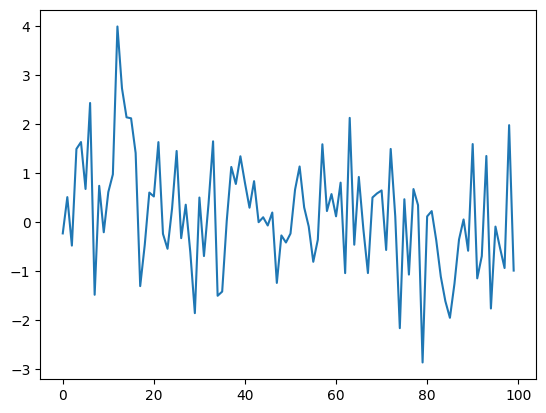

In [4]:
import numpy.random

y_data = []
for i in range(100):
    y_data.append(numpy.random.normal(0.0, 1.0))

import pylab
pylab.plot(y_data)
pylab.show()

We can also just pull everything from a library into our current scope,

In [6]:
import math
print(math.sin(2))
print(sin(2))      #<- Should this give an error? Why the strange sin(2) result? why is it not 0.909297?
from math import *
print(sin(2))      #<- Fine now

0.9092974268256817
0.9092974268256817
0.9092974268256817


So why not pull everything from libraries all the time? You want to keep your scope as clean and explicit as possible so you know where the code you're running is coming from.

For example, that first `sin(2)` line is actually running the `sympy.sin` function, as we did a `from sympy import *` right at the start of the notebook. We then overwrote it with the `from math import *`. Generally importing everything without a sub namespace is bad practice. 

Now we're ready to work on some problems and explore this scope thing a little more carefuly.